# Lawyers birth distribution on DBpedia

In [1]:
from SPARQLWrapper import SPARQLWrapper, SPARQLWrapper2, JSON, TURTLE, XML, RDFXML
import pprint
import csv
# from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np 
from collections import Counter
from operator import itemgetter


In [47]:
query = """

PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
PREFIX foaf: <http://xmlns.com/foaf/0.1/>
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX owl: <http://www.w3.org/2002/07/owl#>
PREFIX dbp: <http://dbpedia.org/property/>
PREFIX  dbr:  <http://dbpedia.org/resource/>

SELECT DISTINCT ?person ?name (year(xsd:dateTime(?Birth_Date)) AS ?year)

WHERE
     {
        {?person ?propriety dbr:Lawyer .
        ?person foaf:name ?name .
        ?person dbp:birthDate ?Birth_Date .
        ?person owl:sameAs ?sameAs .
        ?person dbo:abstract ?abstract .
    FILTER (xsd:string(?name) !="Marcus Tullius Cicero")
        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
        FILTER (CONTAINS(?name, " "))
        }
     UNION
        {?person ?propriety dbr:Jurist .
        ?person foaf:name ?name .
        ?person dbp:birthDate ?Birth_Date .
        ?person owl:sameAs ?sameAs .
        ?person dbo:abstract ?abstract .
    FILTER (xsd:string(?name) !="Marcus Tullius Cicero")

        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
        FILTER (CONTAINS(?name, " "))
        }
     UNION
        {
         ?person a dbo:Lawyer .
        ?person foaf:name ?name .
        ?person dbp:birthDate ?Birth_Date .
        ?person owl:sameAs ?sameAs .
    FILTER (xsd:string(?name) !="Marcus Tullius Cicero")
        FILTER (CONTAINS(?name, " "))
        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
        }
     UNION
       {
        ?person a dbo:Professor .
        ?person foaf:name ?name .
        ?person dbp:birthDate ?Birth_Date .
        ?person owl:sameAs ?sameAs .
        ?person dbo:abstract ?abstract .
    FILTER (xsd:string(?name) !="Marcus Tullius Cicero")
        FILTER (CONTAINS(?abstract, "Jurist") || CONTAINS(?abstract, "Lawyer") || CONTAINS(?abstract, "lawyer")  || CONTAINS(?abstract, "jurist")|| CONTAINS(?abstract, "juriste")|| CONTAINS(?abstract, "Juriste"))
        FILTER (CONTAINS(?name, " "))
        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
       }
     UNION
       {
        ?person a dbo:Person .
        ?person foaf:name ?name .
        ?person dbp:birthDate ?Birth_Date .
        ?person owl:sameAs ?sameAs .
        ?person dbo:abstract ?abstract .
    FILTER (xsd:string(?name) !="Marcus Tullius Cicero")
       FILTER (CONTAINS(?name, " "))
        FILTER (CONTAINS(?abstract, "Jurist") || CONTAINS(?abstract, "Lawyer") || CONTAINS(?abstract, "lawyer")  || CONTAINS(?abstract, "jurist")|| CONTAINS(?abstract, "juriste")|| CONTAINS(?abstract, "Juriste"))
        FILTER (xsd:date (?Birth_Date) > "1800-01-01"^^xsd:date)
       }
  }
"""

In [48]:
sparql = SPARQLWrapper("https://dbpedia.org/sparql") ##, returnFormat=RDFXML)


In [49]:
sparql.setQuery(query)
sparql.setReturnFormat(JSON)

In [50]:
rc = sparql.queryAndConvert()
type(rc)

dict

In [51]:
# Nombre de lignes du résultat
len(rc['results']['bindings'])

10000

### Analyse of the result

In [52]:
# Number of rows in the result
len(rc['results']['bindings'])

10000

In [53]:
# Inspect the first three rows
i = 0
for l in rc['results']['bindings']:
    if i < 5:
        print(l)
        i += 1

{'person': {'type': 'uri', 'value': 'http://dbpedia.org/resource/A._Brown_Moore'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Andre Brown Moore'}, 'year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1911'}}
{'person': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Lubomir_Dymsha'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Dymsha Lubomir. Deputy of the 4th Duma, 1913'}, 'year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1860'}}
{'person': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Luciana_León'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Luciana León'}, 'year': {'type': 'typed-literal', 'datatype': 'http://www.w3.org/2001/XMLSchema#integer', 'value': '1978'}}
{'person': {'type': 'uri', 'value': 'http://dbpedia.org/resource/Lucien_Anderson'}, 'name': {'type': 'literal', 'xml:lang': 'en', 'value': 'Lucien Anderson'}, 'year': {'type': 

In [66]:
# Extract the values from the first five rows
i = 0
for l in rc['results']['bindings']:
    if i < 30:
        try: 
            name = l['name']['value']
            print([l['person']['value'],name,l['year']['value']])
        except :
            try: 
                name = l['prefLabel']['value']
                print([l['person']['value'],name,l['year']['value']])
            except :
                print([l['person']['value'],'',l['year']['value']])

        i += 1

['http://dbpedia.org/resource/A._Brown_Moore', 'Andre Brown Moore', '1911']
['http://dbpedia.org/resource/Lubomir_Dymsha', 'Dymsha Lubomir. Deputy of the 4th Duma, 1913', '1860']
['http://dbpedia.org/resource/Luciana_León', 'Luciana León', '1978']
['http://dbpedia.org/resource/Lucien_Anderson', 'Lucien Anderson', '1824']
['http://dbpedia.org/resource/Lucien_Bonaparte_Chase', 'Lucien Bonaparte Chase', '1817']
['http://dbpedia.org/resource/Lucien_Bouchard', 'Lucien Bouchard', '1938']
['http://dbpedia.org/resource/Lucien_C._Gause', 'Lucien Coatsworth Gause', '1836']
['http://dbpedia.org/resource/Lucien_Cooremans', 'Lucien Cooremans', '1899']
['http://dbpedia.org/resource/Lucien_François', 'Lucien François', '1934']
['http://dbpedia.org/resource/Lucius_E._Burch_Jr.', 'Lucius E. Burch Jr.', '1912']
['http://dbpedia.org/resource/Lucius_Jeremiah_Gartrell', 'Lucius Jeremiah Gartrell', '1821']
['http://dbpedia.org/resource/Lucjan_Wolanowski', 'Lucjan Wolanowski', '1920']
['http://dbpedia.org/re

### Inspects years of birth and count the number of births per year

In [55]:
# Explore
yearsList = []
for l in rc['results']['bindings']:
    yearsList.append(l['year']['value'])

In [56]:
min(yearsList), max(yearsList)

('1800', '2009')

In [57]:
yearsList.sort()

In [58]:
# Count births per year
counterYearsList = Counter(yearsList)
groupedYearsList = list(zip(counterYearsList.keys(), counterYearsList.values()))

In [59]:
groupedYearsList

[('1800', 16),
 ('1801', 9),
 ('1802', 15),
 ('1803', 11),
 ('1804', 18),
 ('1805', 17),
 ('1806', 19),
 ('1807', 10),
 ('1808', 25),
 ('1809', 20),
 ('1810', 16),
 ('1811', 21),
 ('1812', 19),
 ('1813', 21),
 ('1814', 16),
 ('1815', 21),
 ('1816', 28),
 ('1817', 47),
 ('1818', 46),
 ('1819', 34),
 ('1820', 27),
 ('1821', 31),
 ('1822', 43),
 ('1823', 43),
 ('1824', 39),
 ('1825', 50),
 ('1826', 31),
 ('1827', 44),
 ('1828', 45),
 ('1829', 40),
 ('1830', 35),
 ('1831', 30),
 ('1832', 28),
 ('1833', 44),
 ('1834', 40),
 ('1835', 41),
 ('1836', 42),
 ('1837', 47),
 ('1838', 43),
 ('1839', 32),
 ('1840', 31),
 ('1841', 33),
 ('1842', 46),
 ('1843', 36),
 ('1844', 42),
 ('1845', 36),
 ('1846', 37),
 ('1847', 39),
 ('1848', 36),
 ('1849', 40),
 ('1850', 35),
 ('1851', 34),
 ('1852', 44),
 ('1853', 29),
 ('1854', 34),
 ('1855', 34),
 ('1856', 30),
 ('1857', 46),
 ('1858', 44),
 ('1859', 29),
 ('1860', 43),
 ('1861', 60),
 ('1862', 30),
 ('1863', 46),
 ('1864', 41),
 ('1865', 33),
 ('1866', 3

In [60]:
# Transform years from string to integer
groupedYearsList = [[int(i[0]), i[1]] for i in groupedYearsList]

In [61]:
### Create a list of five years period, i.e. the list of the first year of each period
d_list = []
period = 5
d_start = 1800
d_list.append(d_start)

i = 0
while i < 35:
    d_start = d_start + period
    d_list.append(d_start)
    i += 1

In [62]:
print(d_list[:2])
min(d_list), max(d_list)

[1800, 1805]


(1800, 1975)

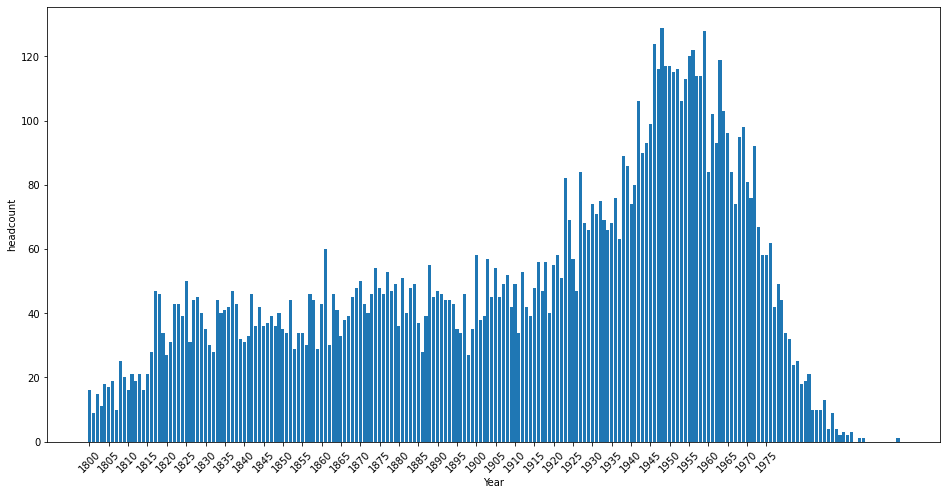

In [63]:
objects = [l[0] for l in groupedYearsList]
eff = [l[1] for l in groupedYearsList]

p1 = plt.bar(objects, eff)

plt.xticks(d_list)
plt.xlabel('Year')
plt.ylabel('headcount')
plt.title("")
plt.gcf().set_size_inches(16, 8)
plt.xticks(rotation=45)
## Change of fontsize and angle of xticklabels
plt.show()

In [64]:
# Grouping by five year period
i_list = []
for i in d_list:
    i_n = 0
    for l in groupedYearsList:
        if l[0] >= i and l[0] < (i + 5):
            i_n = i_n + l[1]
    i_list.append([i, i_n])        

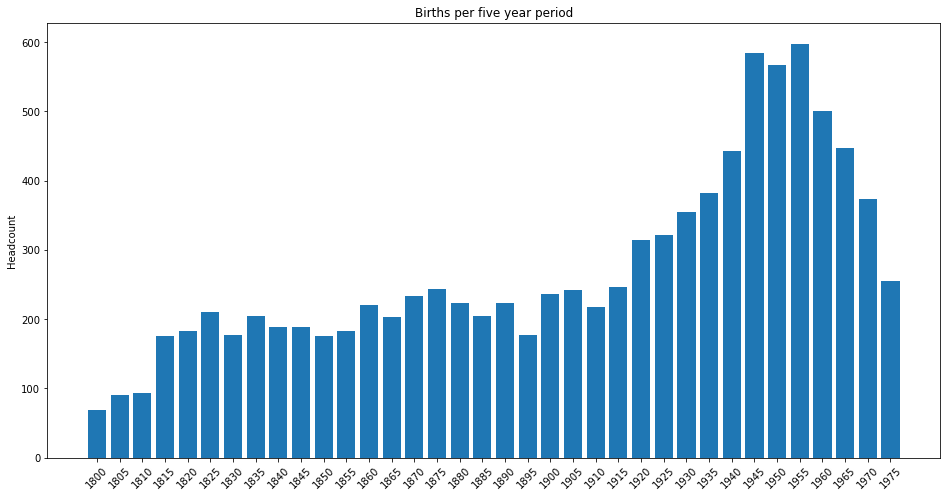

In [65]:
# Distribution by 5-year period

objects = [str(l[0]) for l in i_list]
eff = [l[1] for l in i_list]

p1 = plt.bar(objects, eff)

plt.ylabel('Headcount')
plt.title('Births per five year period')
plt.gcf().set_size_inches(16, 8)

plt.xticks(rotation=45)
plt.show()
